In [2]:
import pandas as pd
df = pd.read_csv("../../data/Banking/train.csv",sep=";")


In [3]:
df.describe()
df.head()
df.sort_values("balance")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
15682,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no
38736,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no
7413,43,management,married,tertiary,yes,-3372,yes,no,unknown,29,may,386,2,-1,0,unknown,no
1896,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,unknown,no
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


[<Axes: ylabel='balance'> <Axes: ylabel='age'>]


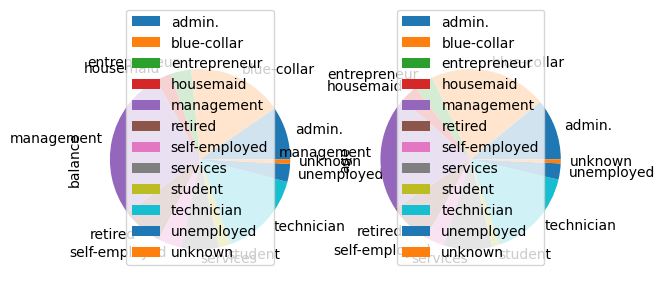

In [5]:
df1 = df.groupby("job")[["balance","age"]].sum().plot(kind="pie", subplots=True)
print(df1)

/var/folders/wy/4n8v6qt16cn423509rq3fx2w0000gn/T/ipykernel_69184/689588534.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plot.legend()


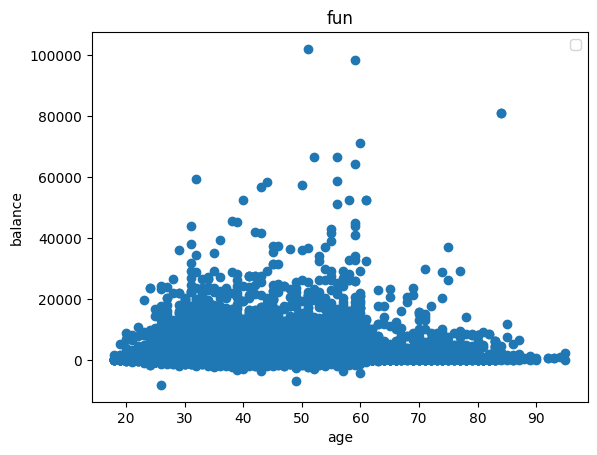

In [3]:
import matplotlib.pyplot as plot
plot.figure()
plot.xlabel("age")
plot.ylabel("balance")
plot.title("fun")
plot.legend()
import pandas as pd
df = pd.read_csv("../../data/Banking/train.csv",sep=";")

plot.scatter(df["age"], df["balance"])
plot.show()

In [40]:
import pandas as pd

# Create the dataset
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Class': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Score': [98, 62, 68, 100, 74, 78, 82, 88, 92, 95]
}
df = pd.DataFrame(data)
df.sort_values('Student')
df['grades'] = df['Score'].apply(lambda x: 'Best' if x>70 else 'Avg'
print(df)

df2 = df.groupby('Class').agg({'Score':'mean','Score':'median'})
print(df2)
df2.to_excel("out.xlsx")

  Student Class  Score grades
0       A     X     98   Best
1       B     Y     62    Avg
2       C     X     68    Avg
3       D     Y    100   Best
4       E     X     74   Best
5       F     Y     78   Best
6       G     X     82   Best
7       H     Y     88   Best
8       I     X     92   Best
9       J     Y     95   Best
       Score
Class       
X       82.0
Y       88.0


In [38]:
df3 = df.pivot_table(values = 'Score', index = 'Class')
print(df3)

       Score
Class       
X       82.8
Y       84.6


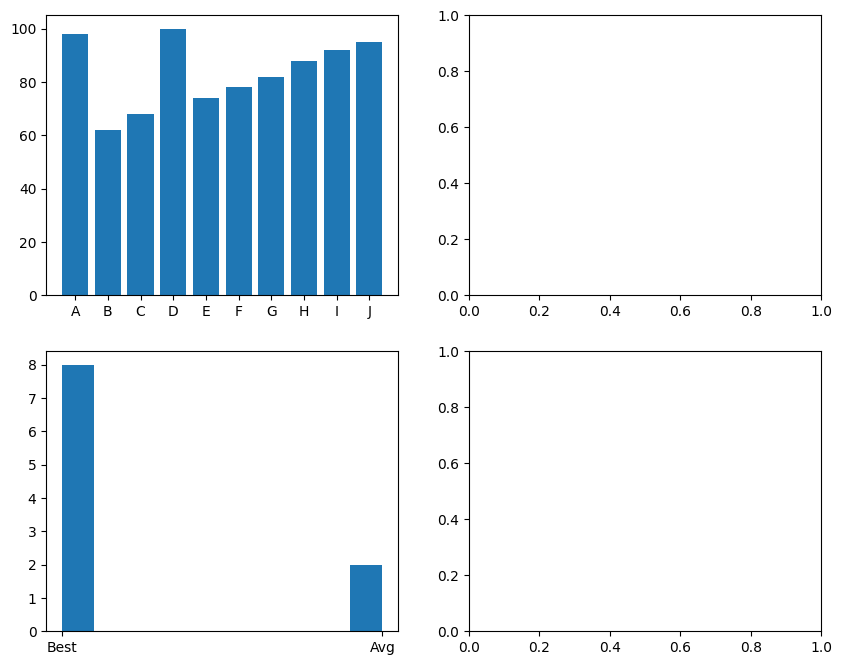

In [41]:
import pandas as pd
from matplotlib import pyplot as plot

# Create the dataset
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Class': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Score': [98, 62, 68, 100, 74, 78, 82, 88, 92, 95]
}
df = pd.DataFrame(data)
df.sort_values('Student')
df['grades'] = df['Score'].apply(lambda x: 'Best' if x>70 else 'Avg'
print(df)
                                 
fig, axis = plot.subplots(2, 2, figsize=(10,8))
axis[0,0].bar(df['Student'], df['Score'])
axis[1,0].hist(df['grades'])
plot.savefig('sample.jpeg')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and create DF
(x_full, y_full), _ = boston_housing.load_data()
df = pd.DataFrame(x_full, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df['PRICE'] = y_full

# Filter: Keep only low-crime, high-room houses (educational subset)
filtered_df = df.query('CRIM < 5 and RM > 6').dropna()  # ~200 samples
print(f"Filtered shape: {filtered_df.shape}")

# Visualize: Scatter before/after filter
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(df['RM'], df['PRICE']); ax1.set_title('Full Data')
ax2.scatter(filtered_df['RM'], filtered_df['PRICE']); ax2.set_title('Filtered (Low Crime, >6 Rooms)')
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [43]:
!pip install tensorflow


^C


In [44]:
import pandas as pd

# Create the dataset
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Class': ['X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X', 'Y'],
    'Score': [55, 62, 68, 70, 74, 78, 82, 88, 92, 95]
}
df = pd.DataFrame(data)

# Perform groupby to calculate mean score by class
result = df.groupby('Class').agg({'Score': 'mean'})

# Save to Excel
result.to_excel('average_scores_by_class.xlsx', index=True)


In [53]:
import seaborn as sb
df = sb.load_dataset('tips')
df.head()
df2 = df.groupby('day').agg({"tip":"mean"})
print(df2)
df.describe()
df.info()

           tip
day           
Thur  2.771452
Fri   2.734737
Sat   2.993103
Sun   3.255132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


/var/folders/wy/4n8v6qt16cn423509rq3fx2w0000gn/T/ipykernel_69184/2529977501.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby('day').agg({"tip":"mean"})


In [54]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [55]:
df2.to_excel("tips_2.xlsx", index=True)

In [56]:
# Group by day, compute multiple stats for tip and total_bill
stats_by_day = df.groupby('day').agg({
    'tip': ['mean', 'median', 'std', 'min', 'max', 'count'],
    'total_bill': ['mean', 'median', 'std']
})
stats_by_day.columns = ['tip_mean', 'tip_median', 'tip_std', 'tip_min', 'tip_max', 'tip_count',
                        'bill_mean', 'bill_median', 'bill_std']
print("\nStats by Day:")
print(stats_by_day.round(2))


Stats by Day:
      tip_mean  tip_median  tip_std  tip_min  tip_max  tip_count  bill_mean  \
day                                                                           
Thur      2.77        2.30     1.24     1.25     6.70         62      17.68   
Fri       2.73        3.00     1.02     1.00     4.73         19      17.15   
Sat       2.99        2.75     1.63     1.00    10.00         87      20.44   
Sun       3.26        3.15     1.23     1.01     6.50         76      21.41   

      bill_median  bill_std  
day                          
Thur        16.20      7.89  
Fri         15.38      8.30  
Sat         18.24      9.48  
Sun         19.63      8.83  


/var/folders/wy/4n8v6qt16cn423509rq3fx2w0000gn/T/ipykernel_69184/2139915195.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_day = df.groupby('day').agg({
